## AND Neuron

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

In [3]:
input_layer_size = 2
output_layer_size = 1

In [4]:
x = tf.placeholder(tf.float32, [None, input_layer_size])
yb = tf.placeholder(tf.float32, [None, output_layer_size])

batch_size = 100

In [5]:
W_layer1=tf.Variable(tf.random_uniform([input_layer_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")
l1 = tf.add(tf.matmul(x, W_layer1), b_layer1)
l1 = tf.nn.sigmoid(l1)

In [6]:
prediction = l1
cost = tf.reduce_mean(tf.reduce_sum((yb-prediction)**2))
optimizer =  tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()

In [8]:
sess.run(init)
for i in range(5000):
  sess.run(optimizer, feed_dict={x: X, yb: Y})

In [9]:
print(sess.run(prediction, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, yb: Y}))

[[ 0.34240079]]
[[ 2.63166976]
 [ 2.63555002]]


In [10]:
w=[sess.run(b_layer1, feed_dict={x: X, yb: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, yb: Y})]
m=((w[0]/w[2]))/((-w[0]/w[1]))

(-5.2, 5.2)

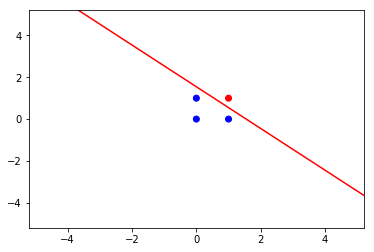

In [11]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [12]:
sess.close()

## XOR Neural Network

In [3]:
X2=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y2=np.asarray([[0],[1],[1],[0]])

In [4]:
X2

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [14]:
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

In [15]:
x2 = tf.placeholder(tf.float32, [None, input_layer_size])
yb2 = tf.placeholder(tf.float32, [None, output_layer_size])

In [16]:
W2_layer1 = tf.Variable(tf.random_uniform([input_layer_size, hidden_layer_size]), name="W_layer1")
b2_layer1 = tf.Variable(tf.zeros([hidden_layer_size]), name="b_layer1")

W2_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size, output_layer_size], -1, 1), name = "W_layer2")
b2_layer2 = tf.Variable(tf.zeros([output_layer_size]), name = "b_layer2")

In [17]:
y1 = tf.nn.sigmoid(tf.matmul(x2, W2_layer1) + b2_layer1)
y2 = tf.nn.sigmoid(tf.matmul(x2, W2_layer2) + b2_layer2)

cost2 = tf.reduce_mean(tf.reduce_sum((yb2 - y2)**2))
optimizer2 = tf.train.GradientDescentOptimizer(0.1).minimize(cost2)

In [18]:
init2 = tf.global_variables_initializer()
sess2 = tf.Session()

In [19]:
sess2.run(init2)
for j in range(5000):
    sess2.run(optimizer2, feed_dict = {x2: X2, yb2: Y2})

In [20]:
print(sess2.run(y2, feed_dict={x2:[[0.8,0.5]]}))
print(sess2.run(W2_layer2, feed_dict={x2: X2, yb2: Y2}))

[[ 0.5]]
[[ -1.32626212e-07]
 [ -1.32683056e-07]]


In [21]:
w2=[sess2.run(b2_layer2, feed_dict={x2: X2, yb2: Y2})[0]]+[i[0] for i in sess2.run(W2_layer2, feed_dict={x2: X2, yb2: Y2})]

In [22]:
m2=((w2[0]/w2[2]))/((-w2[0]/w2[1]))

(-0.5, 1.2)

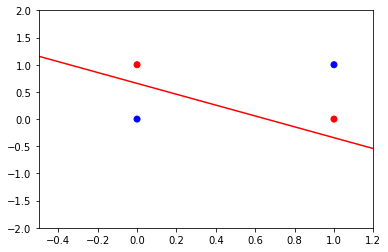

In [23]:
plt.scatter(X2[:,0],X2[:,1],c=['red' if i==1 else 'blue' for i in Y2])
x3 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x3,-w2[0]/w2[2]+m2*x3,color='red')
#plt.plot(x3,-w2[0]/w2[2]+m*x3,color='blue')

#plt.plot(x,-(yb2[0]/w1[1])-(w1[0]/w1[1])*x) 
#plt.plot(x2,-(yb2[1]/w2[1])-(w2[0]/w2[1])*x2)

plt.ylim([-2, 2])
plt.xlim([-0.5, 1.2])

## Circle Neural Network 